In [1]:
import numpy as np

In [2]:
lines = [line.rstrip('\n') for line in open('nursery.data.txt')]

In [3]:
print(lines[0])
row = lines[0].split(',')
print(row)

usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
['usual', 'proper', 'complete', '1', 'convenient', 'convenient', 'nonprob', 'recommended', 'recommend']


In [4]:
attr_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']

In [19]:
attr_list = [['usual', 'pretentious','great_pret'],
['proper','less_proper','improper','critical','very_crit'],
['complete', 'completed', 'incomplete', 'foster'],
['1', '2', '3', 'more'],
['convenient', 'less_conv', 'critical'],
['convenient', 'inconv'],
['nonprob', 'slightly_prob', 'problematic'],
['recommended', 'priority', 'not_recom'],
['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior']]
print(attr_list[8])
class_name = ['not_recom', 'priority', 'spec_prior']

['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior']


In [6]:
data = []
for i in range(len(lines)-1):
    row = lines[i].split(',')
#     print(row)
    sample = []
    for j in range(len(row)):
#         print(attr_list[j])
#         print(row[j])
        sample.append(attr_list[j].index(row[j]))
#     print(sample)
    if sample[8] != 2 and sample[8] != 1:
        data.append(sample)
#     data.append(sample)
data = np.asarray(data)
print(data.shape)

(12630, 9)


In [7]:
from sklearn.model_selection import train_test_split

feature = data[:,0:8]
label = data[:,8].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8841, 8)
(8841, 1)
(3789, 8)
(3789, 1)


In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test).reshape(-1, 1)
print(y_pred.shape)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

(3789, 1)
Number of mislabeled points out of a total 3789 points : 302
The error rate is: 0.079704 


/Users/Deep_Learning/anaconda3/envs/dl_basic/lib/python2.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1307,    0,    0],
       [   0, 1135,  146],
       [   0,  156, 1045]])

In [10]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 3789 points : 928
The error rate is: 0.244920 


array([[1289,   18,    0],
       [ 258,  732,  291],
       [  46,  315,  840]])

In [11]:
from sklearn import svm

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
# clf = svm.LinearSVC()
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 3789 points : 52
The error rate is: 0.013724 


array([[1307,    0,    0],
       [   0, 1255,   26],
       [   0,   26, 1175]])

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 3789 points : 287
The error rate is: 0.075746 


/Users/Deep_Learning/anaconda3/envs/dl_basic/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[1307,    0,    0],
       [   0, 1150,  131],
       [   0,  156, 1045]])

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 3789 points : 6
The error rate is: 0.001584 


array([[1307,    0,    0],
       [   0, 1277,    4],
       [   0,    2, 1199]])

Number of mislabeled points out of a total 3789 points : 4
The error rate is: 0.001056 


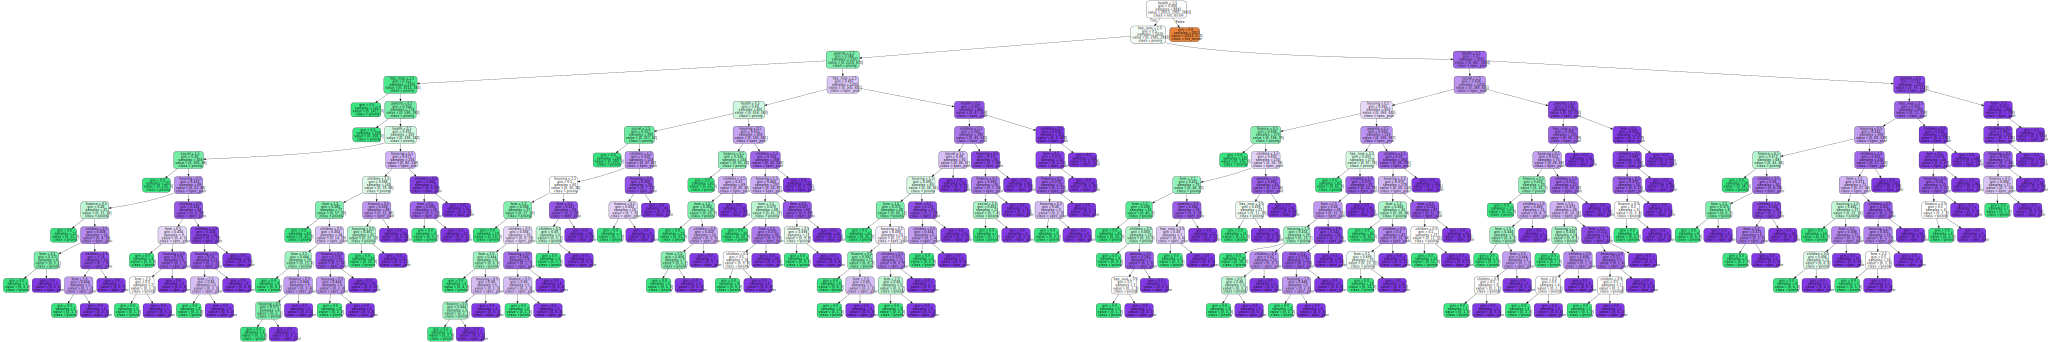

In [23]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=attr_names,  
                     class_names=class_name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT_Nursery") 
graph

In [28]:
from pomegranate import BayesianNetwork
import seaborn, time
seaborn.set_style('whitegrid')

model = BayesianNetwork.from_samples(feature, algorithm='exact')
print model.structure
model.plot()

((), (), (), (), (), (), (), ())


ValueError: must have pygraphviz installed for visualization